# Classification in Practice

In this laboratory session we will gain some experience working with linear models for **classification** (we already saw how to do regression in a previous lab).

We will follow the same general structure... with one exception -- for this laboratory we will begin with **synthetic** datasets. 

## Part 1: Working with Synthetic Classification Problems

Generating synthetic datasets allows us to gain insight into how classifiers work. We will use some functionality of Scikit-learn to generate -- in a controlled manner -- synthetic classification problems of with various characteristics.

**Note**: When working with these synthetic datasets we will *not* go to the trouble of generating train/test splits -- we are only interested in studying how classifiers work to **separate** the training data.

### Exercise 1.1: Generating a dataset

First, have a look at the documentation for [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). This is one of the easiest ways to generate /simple/ classification problems. Study the documentation and then use `make_blobs` to generate an **EASY** dataset for a **two-class** classification problem with 100 samples per class and 2 input features. What does **EASY** mean? How can we determine, qualitatively, that the randomly generated dataset is "easy"?

**Hint**: You will probably want to develop a *visualization* for datasets, and then *abstract* it into a function you can call later for other datasets. 

Text(0.5, 1.0, 'Synthetic Data with 2 Clusters')

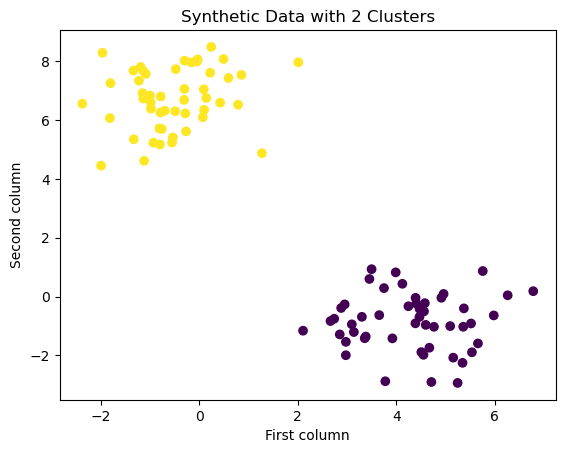

In [182]:
# Your code here.
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

(Xs_easy, ys_easy) = make_blobs(n_samples=100, n_features=2, centers=2)
plt.scatter(Xs_easy[:, 0], Xs_easy[:, 1], c=ys_easy)
plt.xlabel("First column")
plt.ylabel("Second column")
plt.title('Synthetic Data with 2 Clusters')


### Exercise 1.2: "Solving" the dataset

Train a classifier that is *perfectly* classifies the dataset you created above. Any of the the three classifiers mentioned in the *Capsule Lecture* should do well. Try one, or try all three. Be sure to verify that the classifier does *indeed* classify all training points correctly.

**Hint**: You might want to look at [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for this.

accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



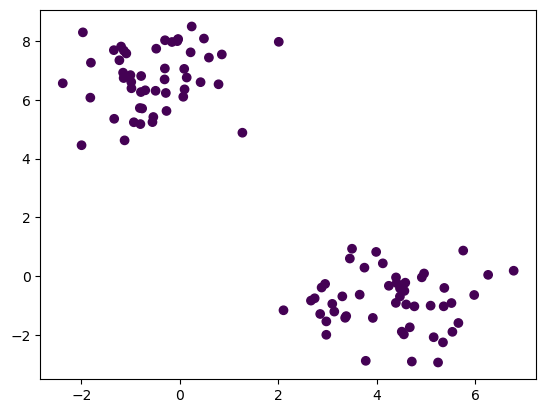

In [183]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC #support vector classifier
from  sklearn.metrics import classification_report

ldc = LinearDiscriminantAnalysis()
ldc.fit(Xs_easy, ys_easy)
correct = (ldc.predict(Xs_easy) == ys_easy)
plt.scatter(Xs_easy[:, 0], Xs_easy[:, 1], c=correct)
accuracy = sum(correct)/(len(correct))
print(f"accuracy:  {accuracy}")
print(classification_report(ys_easy, ldc.predict(Xs_easy)))

/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


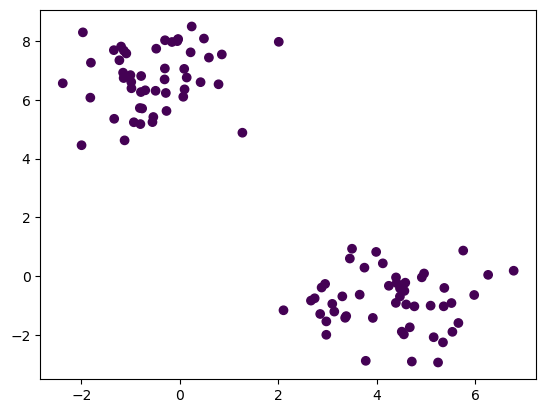

In [184]:
svc = LinearSVC()
svc.fit(Xs_easy, ys_easy)
(svc.predict(Xs_easy) == ys_easy)
correct = (svc.predict(Xs_easy) == ys_easy)
plt.scatter(Xs_easy[:, 0], Xs_easy[:, 1], c=correct) 


### Exercise 1.3: Visualizing the decision surfaces

One of the best ways to understand how a classifier works is to visualize the decision boundaries. Use [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to create a visualization of the *dataset* and the *decision boundaries* for your classifier.

**Note**: This is another great opportunity to apply *functional abstraction* and make a **reusable** visualization that you can reuse (for example in the next exercise).

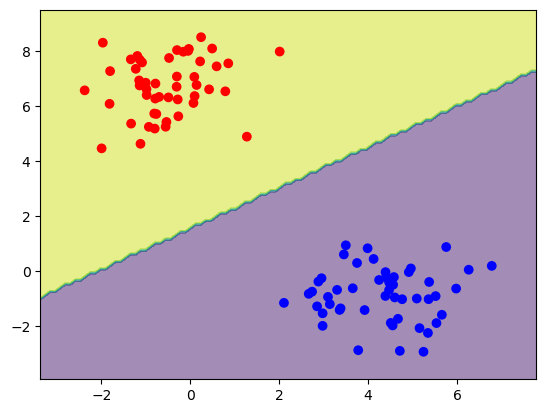

In [185]:
from sklearn.inspection import DecisionBoundaryDisplay

ldc = LinearDiscriminantAnalysis()
ldc.fit(Xs_easy, ys_easy)
disp = DecisionBoundaryDisplay.from_estimator(ldc, Xs_easy, response_method="predict", alpha=0.5)
plt.scatter(Xs_easy[:, 0], Xs_easy[:, 1], c=ys_easy, cmap="bwr")

/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


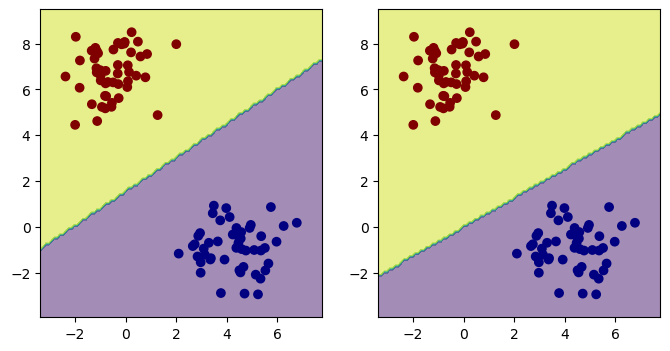

In [194]:
ldc = LinearDiscriminantAnalysis()
ldc.fit(Xs_easy, ys_easy)

svc = LinearSVC(C=0.00000001)
svc.fit(Xs_easy, ys_easy)

plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
disp = DecisionBoundaryDisplay.from_estimator(
    ldc, Xs_easy, ax=ax, response_method="predict", alpha=0.5)
plt.scatter(Xs_easy[:, 0], Xs_easy[:, 1], c=ys_easy, cmap="jet")
ax = plt.subplot(1, 2, 2)
disp = DecisionBoundaryDisplay.from_estimator(
    svc, Xs_easy, ax=ax, response_method="predict", alpha=0.5)
plt.scatter(Xs_easy[:, 0], Xs_easy[:, 1], c=ys_easy, cmap="jet")

### Exercise 1.4: A harder dataset

Repeat the exercises above, but first generate a **hard** dataset that is not linearly separable. Observe how linear classifiers fail to correctly classify the training data. How can we make these classifiers capable of "solving" this harder dataset?

/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1)

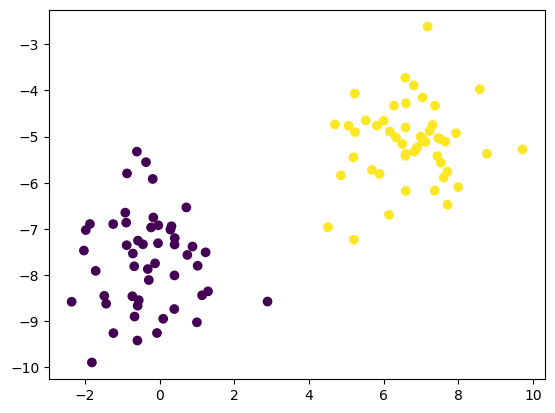

In [196]:
from sklearn.preprocessing import PolynomialFeatures
mapper = PolynomialFeatures()
Xs_mapped = mapper.fit_transform(Xs_easy)


(Xs_easy, ys_easy) = make_blobs(n_samples=100, n_features=2, centers=2)
plt.scatter(Xs_easy[:, 0], Xs_easy[:, 1], c=ys_easy)

qdc = QuadraticDiscriminantAnalysis()
qdc.fit(Xs_mapped, ys_easy)

svc = LinearSVC( C = 1)
svc.fit(Xs_mapped, ys_easy)

In [198]:

print("QDC: ")
print(classification_report(ys_easy, qdc.predict(Xs_mapped)))

print("SVM: ")
print(classification_report(ys_easy, svc.predict(Xs_mapped)))

QDC: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        50
           1       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100

SVM: 
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        50
           1       0.00      0.00      0.00        50

    accuracy                           0.50       100
   macro avg       0.25      0.50      0.33       100
weighted avg       0.25      0.50      0.33       100



/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:960: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:963: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/pampaj/anaconda3/envs/FML/lib/python3.10/site-packages/sklearn/metr

---
## Part 2: A Real Dataset

In the second set of exercises we will work with a classic dataset for classification: the Iris Flower Classification Dataset. It is a fairly easy dataset to work with since it is low-dimensional and small. We start by loading the dataset, and then proceed with our usual protocol: "playing" with the data, creating train/test splits, and building and evaluating a first classifier. 

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# Load the iris classification dataset to get started.
ds = load_iris()

# Extract the features (Xs), targets (ys), and class names (labels).
Xs = ds.data
ys = ds.target
classes = ds.target_names

# Make a Pandas DataFrame too, just for shits and giggles.
df = pd.DataFrame(Xs, columns=ds.feature_names)
targets = pd.Series(ds.target)

### Exercise 2.1: Play with the data

Use everything we have learned about *exploratory data analysis* to study the nature and characteristics of this classification problem. Are the classes equally represented? How many features are there in input? **Be creative** and **summarize** your findings with analysis along the way.

In [188]:
# Your data playground here.

### Exercise 2.2: Your Turn

Design an experiment to decide which of the three classifiers we have seen performs best on this dataset. Some things to keep in mind:
+ You will probably want to use [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to perform K-fold cross-validation to ensure you are *robustly* estimating performance.
+ All three of the classifier models we have used support **regularization**, which might be an interesting hyperparameter to cross-validate. Unfortunately they use slightly different terminologies:
  + in `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` it is called `shrinkage`
  + in `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` it is called `reg_param`
  + and in `sklearn.svm.LinearSVC` it is called `C` -- but the regularization performed is 1/C!
  
**Important**: Remember to *document* your findings and analyses along the way. Summarize and justify your final conclusions.

In [189]:
# Your code here.

---
## Part 3: A Harder Dataset

OK, now let's switch to a the **digits** dataset which should be a bit more challenging. This should be easy by now, and if you have been careful about **functional abstraction** you should be able to reuse much of the functionality from above.

In [190]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

ds_digits = load_digits()
df_digits = pd.DataFrame(ds_digits.data)     # Why are there no column names?
targets_digits = pd.Series(ds_digits.target)

### Exercise 3.1: Exploratory data analysis

You know the drill, see what this dataset is made of.

In [191]:
# Your data playground here.

### Exercise 3.2: Visualize Some Images

Now we are working with (very small) images. There a useful Matplotlib function for visualizing images is `imshow()`. Use it like this:

 `plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')`

 **NOTE**: The Pandas DataFrame structure is kind of getting in our way here -- we have to extract a row, then **convert** it to a numpy array, and then **resize** it to (8,8) to view it.

View some images from the dataset.

In [192]:
# Your code here.

### Exercise 3.3: Find the best classifier (of the three we have seen)

You should now be very familiar with this game and if you consolidated the pieces you used before, this exercise should be easy. As always, document, summarize, and justify your conclusions and analyses.

In [193]:
# Your code here.